In [1]:
import numpy as np
import pandas as pd


In [8]:
sample_x = pd.read_csv("../dataset/sample_test.csv")
sample_y = pd.read_csv("../dataset/sample_test_out.csv")
sample_x.head()

,index,image_link,group_id,entity_name
0,0,https://m.media-amazon.com/images/I/41-NCxNuBx...,658003,width
1,1,https://m.media-amazon.com/images/I/41-NCxNuBx...,658003,depth
2,2,https://m.media-amazon.com/images/I/417NJrPEk+...,939426,maximum_weight_recommendation
3,3,https://m.media-amazon.com/images/I/417SThj+Sr...,276700,voltage
4,4,https://m.media-amazon.com/images/I/417SThj+Sr...,276700,wattage


In [10]:
sample_y.head()

,index,prediction
0,0,21.9 foot
1,1,10 foot
2,2,NaN
3,3,289.52 kilovolt
4,4,1078.99 kilowatt


In [23]:
sample_x['image_link'] = [i.strip("https://m.media-amazon.com/images/I/")[:-2] for i in sample_x['image_link']]

In [24]:
sample_x['image_link']

0     41-NCxNuBxL
1     41-NCxNuBxL
2     417NJrPEk+L
3     417SThj+SrL
4     417SThj+SrL
         ...     
83    81IYdOV0mVL
84    81PG3ea0MOL
85    81aZ2ozp1GL
86    81qUmRUUTTL
87    81qUmRUUTTL
Name: image_link, Length: 88, dtype: object

In [3]:
from PIL import Image
import pytesseract

In [4]:
pytesseract.pytesseract.tesseract_cmd = r"D:\Programs\TesseractOCR\tesseract.exe"

In [11]:
print(pytesseract.image_to_string(r"D:\Programs\DataScience\AmazonML\images\sample\41-NCxNuBxL.jpg"))

20CM

L5G




Detected text: 6 with confidence 0.27402313360211394
Detected text: 0 with confidence 0.06682168496632812
Detected text: 1 with confidence 0.3857354566794733
Detected text: W with confidence 0.4188216891643606
Detected text: 2 with confidence 0.8043668466314244


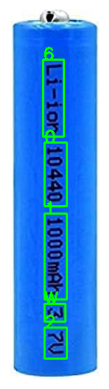

In [5]:
import easyocr
import matplotlib.pyplot as plt
import cv2

# Initialize the EasyOCR reader for English
reader = easyocr.Reader(['en'])

# Path to the image file
image_path = r"D:\Programs\DataScience\AmazonML\images\sample\test\21vv80MKQEL.jpg"

# Perform OCR on the image
results = reader.readtext(image_path)

# Print the results
for (bbox, text, prob) in results:
    print(f"Detected text: {text} with confidence {prob}")

# Optional: Visualize the result using matplotlib
# Load the image using OpenCV
image = cv2.imread(image_path)

# Draw bounding boxes and text on the image
for (bbox, text, prob) in results:
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
    cv2.putText(image, text, top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)

# Convert the image to RGB (for displaying with matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.show()


In [11]:
import pytesseract
from pytesseract import Output

pytesseract.tesseract_cmd = r"D:\Programs\TesseractOCR\tesseract.exe"
results = pytesseract.image_to_osd(image_path, output_type=Output.DICT)
# display the orientation information
print("[INFO] detected orientation: {}".format(
	results["orientation"]))
print("[INFO] rotate by {} degrees to correct".format(
	results["rotate"]))
print("[INFO] detected script: {}".format(results["script"]))

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.